In [1]:
print("This is for Caitlín's rough code")

This is for Caitlín's rough code


In [10]:
#libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_val_score

In [11]:
#import data
os.chdir("..")
data = pd.read_csv("data/bikedata.csv")
data.head()

,Unnamed: 0,TIME,NAME,BIKE.STANDS,AVAILABLE.BIKE.STANDS,AVAILABLE.BIKES,STATUS
0,1,2018-08-01 12:30:02,CHARLEMONT PLACE,40,28,12,Open
1,2,2018-08-01 12:35:02,CHARLEMONT PLACE,40,28,12,Open
2,3,2018-08-01 12:40:02,CHARLEMONT PLACE,40,28,12,Open
3,4,2018-08-01 12:45:02,CHARLEMONT PLACE,40,28,12,Open
4,5,2018-08-01 12:50:02,CHARLEMONT PLACE,40,28,12,Open


In [12]:
#Calculate bike usage
data["BIKE.USAGE"] = data["AVAILABLE.BIKE.STANDS"]/data["BIKE.STANDS"]
data.head()

,Unnamed: 0,TIME,NAME,BIKE.STANDS,AVAILABLE.BIKE.STANDS,AVAILABLE.BIKES,STATUS,BIKE.USAGE
0,1,2018-08-01 12:30:02,CHARLEMONT PLACE,40,28,12,Open,0.7
1,2,2018-08-01 12:35:02,CHARLEMONT PLACE,40,28,12,Open,0.7
2,3,2018-08-01 12:40:02,CHARLEMONT PLACE,40,28,12,Open,0.7
3,4,2018-08-01 12:45:02,CHARLEMONT PLACE,40,28,12,Open,0.7
4,5,2018-08-01 12:50:02,CHARLEMONT PLACE,40,28,12,Open,0.7


In [14]:
bike_dates = pd.to_datetime(data.TIME, format = "%Y-%m-%d %H:%M:%S")
print(bike_dates)

0         2018-08-01 12:30:02
1         2018-08-01 12:35:02
2         2018-08-01 12:40:02
3         2018-08-01 12:45:02
4         2018-08-01 12:50:02
                  ...        
1029255   2022-01-01 23:35:02
1029256   2022-01-01 23:40:02
1029257   2022-01-01 23:45:02
1029258   2022-01-01 23:50:02
1029259   2022-01-01 23:55:02
Name: TIME, Length: 1029260, dtype: datetime64[ns]


In [16]:
bike_dates.dt.date
date_vector = pd.DatetimeIndex(bike_dates.dt.date)
print(date_vector)

DatetimeIndex(['2018-08-01', '2018-08-01', '2018-08-01', '2018-08-01',
               '2018-08-01', '2018-08-01', '2018-08-01', '2018-08-01',
               '2018-08-01', '2018-08-01',
               ...
               '2022-01-01', '2022-01-01', '2022-01-01', '2022-01-01',
               '2022-01-01', '2022-01-01', '2022-01-01', '2022-01-01',
               '2022-01-01', '2022-01-01'],
              dtype='datetime64[ns]', name='TIME', length=1029260, freq=None)


In [19]:
data[Day_index]

,Unnamed: 0,TIME,NAME,BIKE.STANDS,AVAILABLE.BIKE.STANDS,AVAILABLE.BIKES,STATUS,BIKE.USAGE
0,1,2018-08-01 12:30:02,CHARLEMONT PLACE,40,28,12,Open,0.7
1,2,2018-08-01 12:35:02,CHARLEMONT PLACE,40,28,12,Open,0.7
2,3,2018-08-01 12:40:02,CHARLEMONT PLACE,40,28,12,Open,0.7
3,4,2018-08-01 12:45:02,CHARLEMONT PLACE,40,28,12,Open,0.7
4,5,2018-08-01 12:50:02,CHARLEMONT PLACE,40,28,12,Open,0.7
...,...,...,...,...,...,...,...,...
409,410,2018-08-01 23:35:02,PHIBSBOROUGH ROAD,40,12,28,Open,0.3
410,411,2018-08-01 23:40:02,PHIBSBOROUGH ROAD,40,12,28,Open,0.3
411,412,2018-08-01 23:45:02,PHIBSBOROUGH ROAD,40,12,28,Open,0.3
412,413,2018-08-01 23:50:02,PHIBSBOROUGH ROAD,40,12,28,Open,0.3


In [20]:
#Parse dates and times
data.TIME = pd.to_datetime(data.TIME, format = "%Y-%m-%d %H:%M:%S")
print(bike_dates)
data["DATE"] = pd.DatetimeIndex(data.TIME.dt.date)
data.head()
#Calculate bike usage
data["BIKE.USAGE"] = data["AVAILABLE.BIKE.STANDS"]/data["BIKE.STANDS"]
data.head()

0         2018-08-01 12:30:02
1         2018-08-01 12:35:02
2         2018-08-01 12:40:02
3         2018-08-01 12:45:02
4         2018-08-01 12:50:02
                  ...        
1029255   2022-01-01 23:35:02
1029256   2022-01-01 23:40:02
1029257   2022-01-01 23:45:02
1029258   2022-01-01 23:50:02
1029259   2022-01-01 23:55:02
Name: TIME, Length: 1029260, dtype: datetime64[ns]


,Unnamed: 0,TIME,NAME,BIKE.STANDS,AVAILABLE.BIKE.STANDS,AVAILABLE.BIKES,STATUS,BIKE.USAGE,DATE
0,1,2018-08-01 12:30:02,CHARLEMONT PLACE,40,28,12,Open,0.7,2018-08-01
1,2,2018-08-01 12:35:02,CHARLEMONT PLACE,40,28,12,Open,0.7,2018-08-01
2,3,2018-08-01 12:40:02,CHARLEMONT PLACE,40,28,12,Open,0.7,2018-08-01
3,4,2018-08-01 12:45:02,CHARLEMONT PLACE,40,28,12,Open,0.7,2018-08-01
4,5,2018-08-01 12:50:02,CHARLEMONT PLACE,40,28,12,Open,0.7,2018-08-01


In [29]:
#create masks
dataCP = data[data.NAME == "CHARLEMONT PLACE"]
dataSG = data[data.NAME == "ST. STEPHEN'S GREEN EAST"]
dataPR = data[data.NAME == "PHIBSBOROUGH ROAD"]

In [42]:
dataPR.head

<bound method NDFrame.head of          Unnamed: 0                TIME               NAME  BIKE.STANDS  \
276             277 2018-08-01 12:30:02  PHIBSBOROUGH ROAD           40   
277             278 2018-08-01 12:35:02  PHIBSBOROUGH ROAD           40   
278             279 2018-08-01 12:40:02  PHIBSBOROUGH ROAD           40   
279             280 2018-08-01 12:45:02  PHIBSBOROUGH ROAD           40   
280             281 2018-08-01 12:50:02  PHIBSBOROUGH ROAD           40   
...             ...                 ...                ...          ...   
1029255     1029256 2022-01-01 23:35:02  PHIBSBOROUGH ROAD           40   
1029256     1029257 2022-01-01 23:40:02  PHIBSBOROUGH ROAD           40   
1029257     1029258 2022-01-01 23:45:02  PHIBSBOROUGH ROAD           40   
1029258     1029259 2022-01-01 23:50:02  PHIBSBOROUGH ROAD           40   
1029259     1029260 2022-01-01 23:55:02  PHIBSBOROUGH ROAD           40   

         AVAILABLE.BIKE.STANDS  AVAILABLE.BIKES STATUS  BIKE.USAGE   

In [33]:
print(dataPR.DATE)

276       2018-08-01
277       2018-08-01
278       2018-08-01
279       2018-08-01
280       2018-08-01
             ...    
1029255   2022-01-01
1029256   2022-01-01
1029257   2022-01-01
1029258   2022-01-01
1029259   2022-01-01
Name: DATE, Length: 342924, dtype: datetime64[ns]


In [34]:
PRdate_vector = pd.DatetimeIndex(dataPR.DATE.dt.date)
print(PRdate_vector)

DatetimeIndex(['2018-08-01', '2018-08-01', '2018-08-01', '2018-08-01',
               '2018-08-01', '2018-08-01', '2018-08-01', '2018-08-01',
               '2018-08-01', '2018-08-01',
               ...
               '2022-01-01', '2022-01-01', '2022-01-01', '2022-01-01',
               '2022-01-01', '2022-01-01', '2022-01-01', '2022-01-01',
               '2022-01-01', '2022-01-01'],
              dtype='datetime64[ns]', name='DATE', length=342924, freq=None)


In [40]:
# Approach 3
idx_day_of_interest = 0;
Day_of_interest = PRdate_vector[idx_day_of_interest] # pearse_dates.dt.date.iloc[idx_day_of_interest]
Day_index = PRdate_vector == Day_of_interest
print(Day_of_interest)

dataPR[Day_index].head

2018-08-01 00:00:00


<bound method NDFrame.head of      Unnamed: 0                TIME               NAME  BIKE.STANDS  \
276         277 2018-08-01 12:30:02  PHIBSBOROUGH ROAD           40   
277         278 2018-08-01 12:35:02  PHIBSBOROUGH ROAD           40   
278         279 2018-08-01 12:40:02  PHIBSBOROUGH ROAD           40   
279         280 2018-08-01 12:45:02  PHIBSBOROUGH ROAD           40   
280         281 2018-08-01 12:50:02  PHIBSBOROUGH ROAD           40   
..          ...                 ...                ...          ...   
409         410 2018-08-01 23:35:02  PHIBSBOROUGH ROAD           40   
410         411 2018-08-01 23:40:02  PHIBSBOROUGH ROAD           40   
411         412 2018-08-01 23:45:02  PHIBSBOROUGH ROAD           40   
412         413 2018-08-01 23:50:02  PHIBSBOROUGH ROAD           40   
413         414 2018-08-01 23:55:02  PHIBSBOROUGH ROAD           40   

     AVAILABLE.BIKE.STANDS  AVAILABLE.BIKES STATUS  BIKE.USAGE       DATE  
276                     40               

In [38]:
phibs_day_of_interest = dataPR.DATE[Day_index]
time = phibs_day_of_interest.dt.hour
stands = dataPR[Day_index]['AVAILABLE.BIKE.STANDS']
bikes = dataPR[Day_index]['AVAILABLE.BIKES']
bikes

276     0
277     0
278     0
279     0
280     0
       ..
409    28
410    28
411    28
412    28
413    28
Name: AVAILABLE.BIKES, Length: 138, dtype: int64

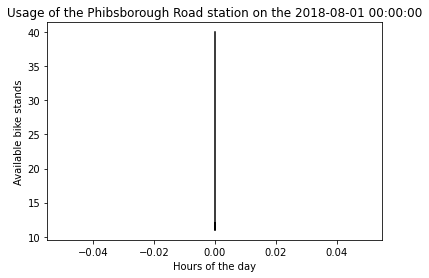

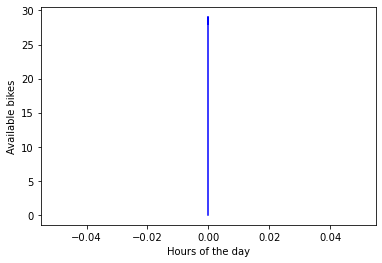

In [39]:
plt.figure()
plt.title(f'Usage of the Phibsborough Road station on the {Day_of_interest}')
plt.plot(time, stands,'k')
plt.xlabel('Hours of the day')
plt.ylabel('Available bike stands')
plt.title(f'Usage of the Phibsborough Road station on the {Day_of_interest}')

plt.figure()
plt.plot(time, bikes,'b')
plt.xlabel('Hours of the day')
plt.ylabel('Available bikes')
plt.show()

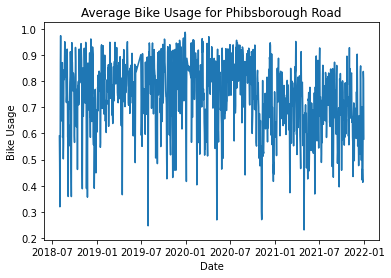

In [43]:
# Group data by date and calculate mean bike usage
usage_by_date = dataPR.groupby('DATE')['BIKE.USAGE'].mean()

# Create a line plot
plt.plot(usage_by_date.index, usage_by_date.values)

# Set plot title and axis labels
plt.title('Average Bike Usage for Phibsborough Road')
plt.xlabel('Date')
plt.ylabel('Bike Usage')

# Show the plot
plt.show()